In [38]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.feature as cfeat
import cartopy.crs as ccrs
import seaborn as sns

In [39]:
 area = xr.open_mfdataset("D:/UGP/datasets/precip.mon.mean.nc").sel(lon = slice(50,110), lat = slice(-20,40),time = slice("2003-01-01" , "2019-12-31"))
area['precip'] = area.precip*30.4167

In [40]:
def make_figure():
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    # generate a basemap with country borders, oceans and coastlines
    ax.add_feature(cfeat.LAND)
    ax.add_feature(cfeat.OCEAN)
    ax.add_feature(cfeat.COASTLINE)
    ax.add_feature(cfeat.BORDERS, linestyle='dotted')
    return fig, ax

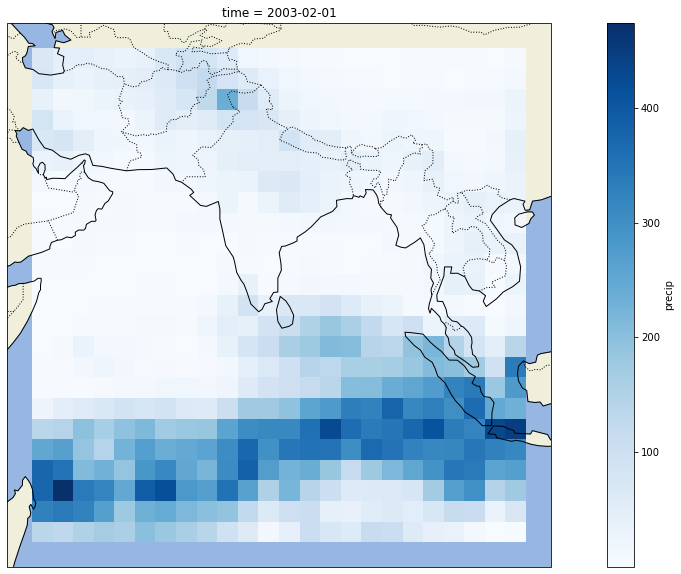

In [41]:
_, ax = make_figure()
grid = area.isel(time=1).precip
grid.plot(ax=ax, transform=ccrs.PlateCarree(), cmap = "Blues")

In [122]:
fig, ax = make_figure()

frames = area.time.size                      # Number of frames
min_value = float(area.precip.min().values)  # Lowest value
max_value = float(area.precip.max().values)  # Highest value

def draw(frame, add_colorbar):
    grid = area.isel(time=frame).precip
    contour = grid.plot(ax=ax, transform=ccrs.PlateCarree(),add_colorbar=add_colorbar, vmin=min_value, vmax=max_value , cmap = "Blues")
    title = "Time - " + str(grid.time.values)
    ax.set_title(title)
    return contour


def init():
    return draw(0, add_colorbar=True)


def animate(frame):
    return draw(frame, add_colorbar=False)


ani = animation.FuncAnimation(fig, animate, frames, interval=0.01, blit=False,init_func=init, repeat=False)
plt.close(fig)

In [ ]:
ani.save('precip.mp4', writer=animation.FFMpegWriter(fps=5))